In [83]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [84]:
df=pd.read_csv('house_price.csv')
df

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


In [85]:
df.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13200.000000,13200.000000,13200.000000,13200.000000,1.320000e+04
mean,1555.302783,2.691136,112.276178,2.800833,7.920337e+03
std,1237.323445,1.338915,149.175995,1.292843,1.067272e+05
min,1.000000,1.000000,8.000000,1.000000,2.670000e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.267000e+03
50%,1275.000000,2.000000,71.850000,3.000000,5.438000e+03
75%,1672.000000,3.000000,120.000000,3.000000,7.317000e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


<Axes: ylabel='price_per_sqft'>

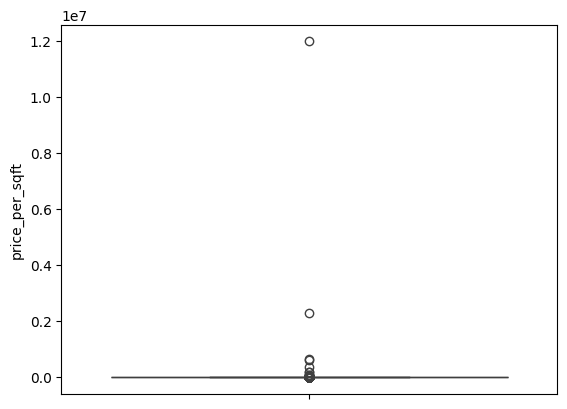

In [86]:
sns.boxplot(df["price_per_sqft"])


<Axes: xlabel='price_per_sqft', ylabel='Count'>

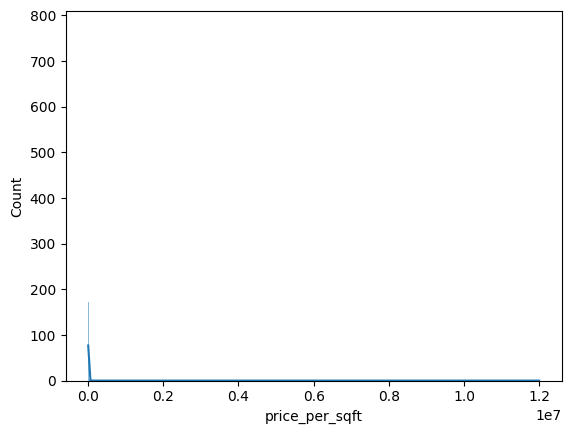

In [21]:
# normality checking
sns.histplot(data=df,x=df.price_per_sqft,kde=True)

# 1. Mean Function

In [87]:
mean=df['price_per_sqft'].mean()
mean

7920.336742424242

In [88]:
s=df.price_per_sqft.std()
s

106727.16032810867

In [108]:
lower_limit = mean - 3 * s
upper_limit = mean + 3 * s
upper_limit,lower_limit

(328101.8177267502, -312261.14424190175)

In [111]:
# trimming
new_df=df.loc[(df['price_per_sqft']<upper_limit)&(df['price_per_sqft']>lower_limit)]
print('before removing ourliers:',len(df))
print('after removing outliers:',len(new_df))
print('outliers:',len(df)-len(new_df))

before removing ourliers: 13200
after removing outliers: 13195
outliers: 5


In [110]:
new_df = df.copy()  
new_df.loc[df['price_per_sqft'] < lower_limit, 'price_per_sqft'] = mean
new_df.loc[df['price_per_sqft'] > upper_limit, 'price_per_sqft'] = mean

C:\Users\Admin\AppData\Local\Temp\ipykernel_4256\3517307665.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '7920.336742424242' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  new_df.loc[df['price_per_sqft'] < lower_limit, 'price_per_sqft'] = mean


<Axes: ylabel='price_per_sqft'>

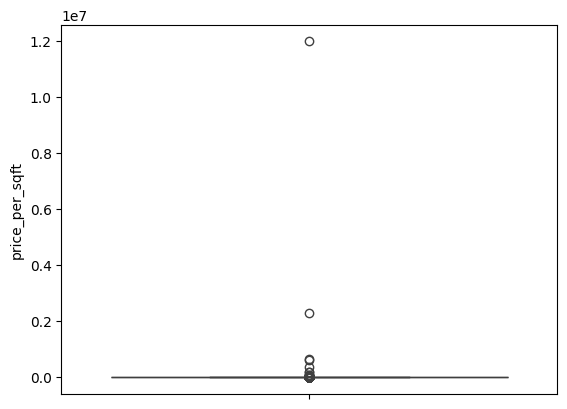

In [113]:
sns.boxplot(df['price_per_sqft'])

In [ ]:
sns.histplot(df['price_per_sqft'])

# 1.Zscore

In [90]:
# upper limit and lower limit
upper_limit=m+3*s
lower_limit=m-3*s
print("upper_limit",upper_limit)
print("lower_limit",lower_limit)

upper_limit 328101.8177267502
lower_limit -312261.14424190175


In [91]:
df[(df.price_per_sqft>upper_limit)|(df.price_per_sqft<lower_limit)]


,location,size,total_sqft,bath,price,bhk,price_per_sqft
345,other,3 Bedroom,11.0,3.0,74.0,3,672727
1106,other,5 Bedroom,24.0,2.0,150.0,5,625000
4044,Sarjapur Road,4 Bedroom,1.0,4.0,120.0,4,12000000
4924,other,7 BHK,5.0,7.0,115.0,7,2300000
11447,Whitefield,4 Bedroom,60.0,4.0,218.0,4,363333


In [45]:
# trimming
new_df=df.loc[(df['price_per_sqft']<upper_limit)&(df['price_per_sqft']>lower_limit)]
print('before removing ourliers:',len(df))
print('after removing outliers:',len(new_df))
print('outliers:',len(df)-len(new_df))

before removing ourliers: 13200
after removing outliers: 13195
outliers: 5


<Axes: ylabel='price_per_sqft'>

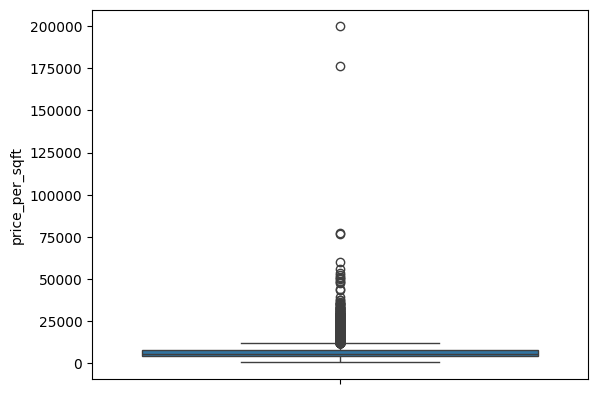

In [17]:
sns.boxplot(new_df['price_per_sqft'])

<Axes: xlabel='price_per_sqft', ylabel='Count'>

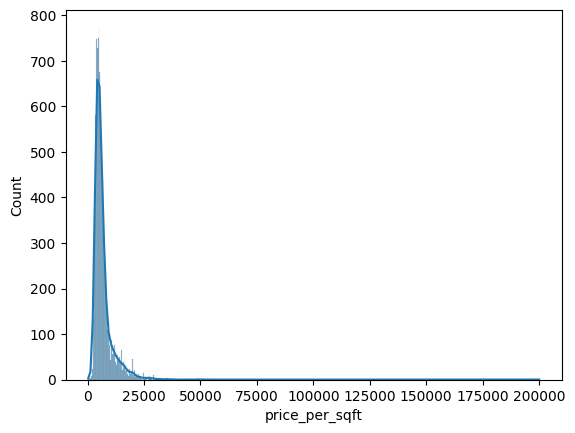

In [46]:
sns.histplot(new_df['price_per_sqft'],kde=True)

In [47]:
# capping
new_df=df.copy()
new_df.loc[new_df['price_per_sqft']>upper_limit,'price_per_sqft']=upper_limit
new_df.loc[new_df['price_per_sqft']<lower_limit,'price_per_sqft']=lower_limit
len(new_df)

C:\Users\Admin\AppData\Local\Temp\ipykernel_4256\3417862347.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '328101.8177267502' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  new_df.loc[new_df['price_per_sqft']>upper_limit,'price_per_sqft']=upper_limit


13200

<Axes: ylabel='price_per_sqft'>

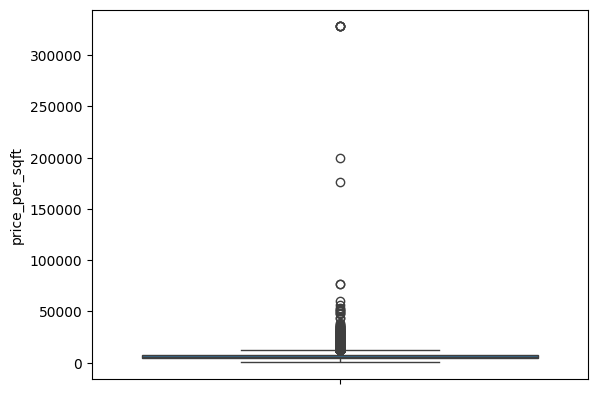

In [48]:
sns.boxplot(new_df['price_per_sqft'])

<Axes: xlabel='price_per_sqft', ylabel='Count'>

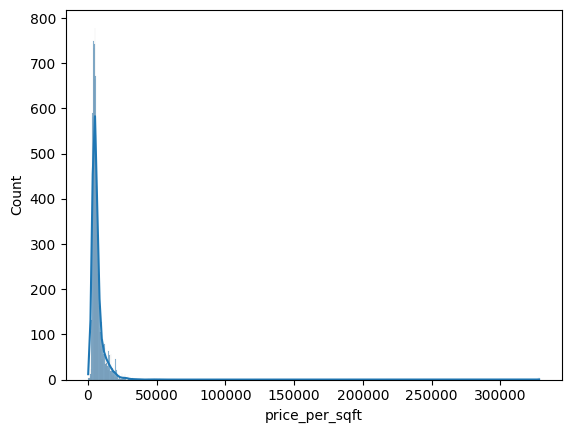

In [49]:
sns.histplot(new_df['price_per_sqft'],kde=True)

# 3.IQR-Inter Quartile Range Mathod

In [50]:
# to find 25th percentile
q1=df.price_per_sqft.quantile(.25)
q1

4267.0

In [51]:
# to find median
df.price_per_sqft.quantile(0.5)

5438.0

In [52]:
# to find 75th percentile
q3=df.price_per_sqft.quantile(.75)
q3

7317.0

In [53]:
iqr=q3-q1
iqr

3050.0

In [54]:
q1,q3,iqr

(4267.0, 7317.0, 3050.0)

In [55]:
upper_limit=q3+(1.5*iqr)
lower_limit=q1+(1.5*iqr)
upper_limit,lower_limit

(11892.0, 8842.0)

<Axes: ylabel='price_per_sqft'>

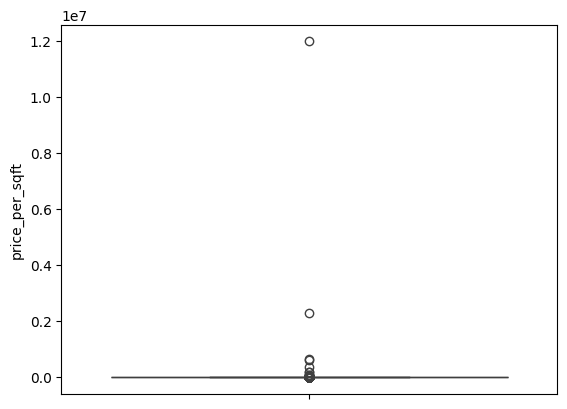

In [56]:
sns.boxplot(df['price_per_sqft'])

In [93]:
# find oulier
df[(df.price_per_sqft<upper_limit)&(df.price_per_sqft>lower_limit)]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


In [58]:
# trimming
new_df=df.loc[(df['price_per_sqft']<upper_limit)&(df['price_per_sqft']>lower_limit)]
print('before removing ourliers:',len(df))
print('after removing outliers:',len(new_df))
print('outliers:',len(df)-len(new_df))

before removing ourliers: 13200
after removing outliers: 917
outliers: 12283


<Axes: ylabel='price_per_sqft'>

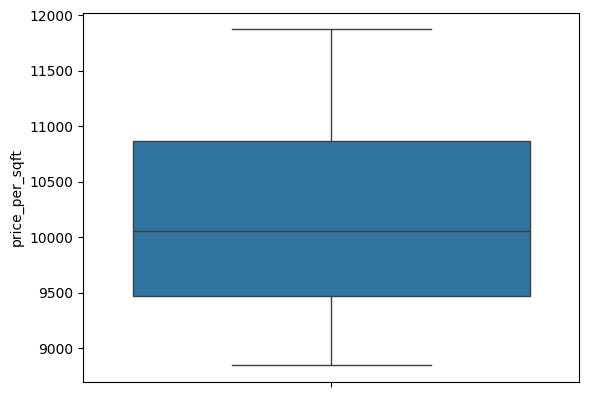

In [60]:
sns.boxplot(new_df['price_per_sqft'])

In [61]:
# capping
new_df=df.copy()
new_df.loc[new_df['price_per_sqft']>upper_limit,'price_per_sqft']=upper_limit
new_df.loc[new_df['price_per_sqft']<lower_limit,'price_per_sqft']=lower_limit
len(new_df)

13200

<Axes: ylabel='price_per_sqft'>

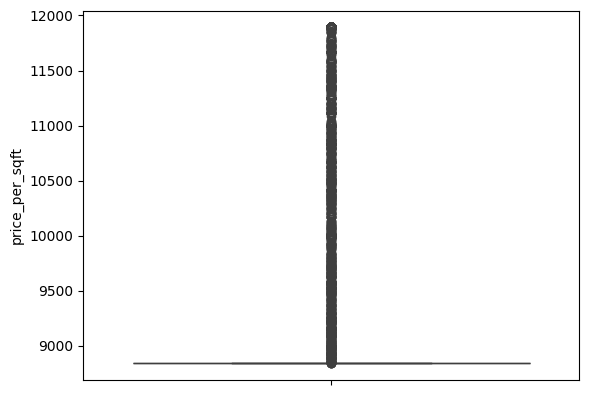

In [62]:
sns.boxplot(new_df['price_per_sqft'])

<Axes: xlabel='price_per_sqft', ylabel='Count'>

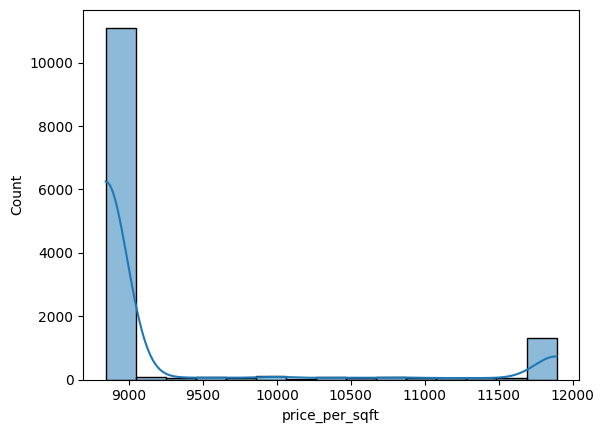

In [64]:
sns.histplot(new_df['price_per_sqft'],kde=True)

# 4.percentile method

In [65]:
upper_limit=df['price_per_sqft'].quantile(0.99)
lower_limit-df['price_per_sqft'].quantile(0.01)
print("upper_limit:",upper_limit)
print("lower_limit:",lower_limit)

upper_limit: 23674.45000000001
lower_limit: 8842.0


<Axes: ylabel='price_per_sqft'>

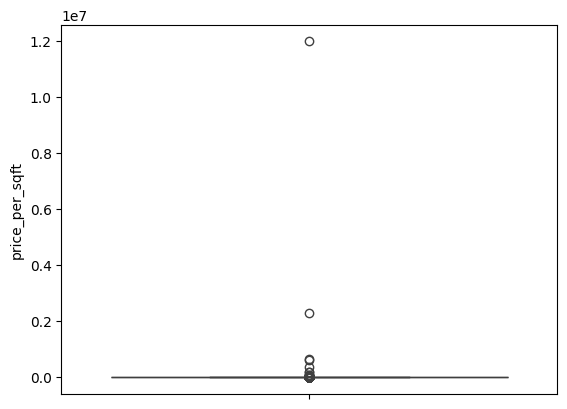

In [66]:
sns.boxplot(df['price_per_sqft'])

In [94]:
# find oulier
df[(df.price_per_sqft<upper_limit)&(df.price_per_sqft>lower_limit)]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


In [68]:
# trimming
new_df=df.loc[(df['price_per_sqft']<=upper_limit)&(df['price_per_sqft']>=lower_limit)]
print('before removing ourliers:',len(df))
print('after removing outliers:',len(new_df))
print('outliers:',len(df)-len(new_df))

before removing ourliers: 13200
after removing outliers: 2050
outliers: 11150


<Axes: ylabel='price_per_sqft'>

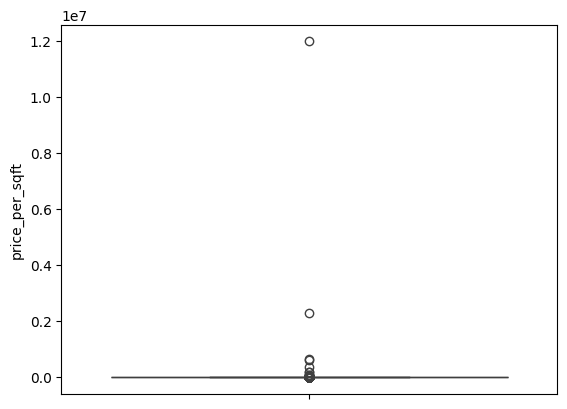

In [69]:
sns.boxplot(df['price_per_sqft'])

In [70]:
# capping
new_df=df.copy()
new_df.loc[new_df['price_per_sqft']>upper_limit,'price_per_sqft']=upper_limit
new_df.loc[new_df['price_per_sqft']<lower_limit,'price_per_sqft']=lower_limit
len(new_df)

C:\Users\Admin\AppData\Local\Temp\ipykernel_4256\3417862347.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '23674.45000000001' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  new_df.loc[new_df['price_per_sqft']>upper_limit,'price_per_sqft']=upper_limit


13200

<Axes: ylabel='price_per_sqft'>

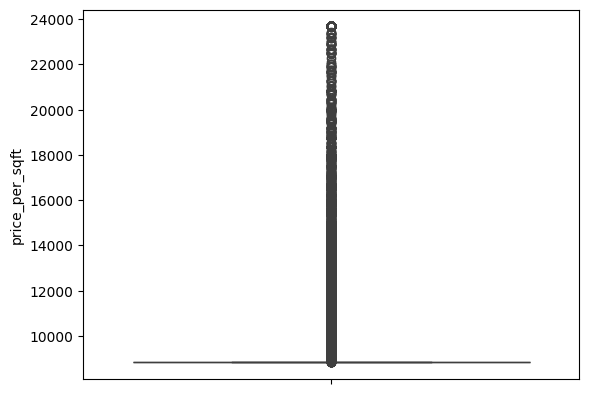

In [71]:
sns.boxplot(new_df['price_per_sqft'])

<Axes: xlabel='price_per_sqft', ylabel='Count'>

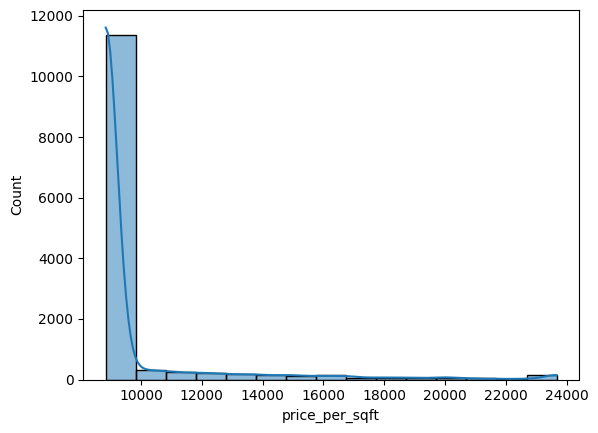

In [72]:
sns.histplot(new_df['price_per_sqft'],kde=True)

# 5. Normal Distribution

In [98]:
mean=df['price_per_sqft'].mean()
mean

7920.336742424242

In [99]:
s=df.price_per_sqft.std()
s

106727.16032810867

In [101]:
lower_limit = mean - 3 * s
upper_limit = mean + 3 * s
upper_limit,lower_limit

(328101.8177267502, -312261.14424190175)

In [102]:
# trimming
new_df=df.loc[(df['price_per_sqft']<=upper_limit)&(df['price_per_sqft']>=lower_limit)]
print('before removing ourliers:',len(df))
print('after removing outliers:',len(new_df))
print('outliers:',len(df)-len(new_df))

before removing ourliers: 13200
after removing outliers: 13195
outliers: 5


In [103]:
# capping
new_df=df.copy()
new_df.loc[new_df['price_per_sqft']>upper_limit,'price_per_sqft']=upper_limit
new_df.loc[new_df['price_per_sqft']<lower_limit,'price_per_sqft']=lower_limit
len(new_df)

C:\Users\Admin\AppData\Local\Temp\ipykernel_4256\3417862347.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '328101.8177267502' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  new_df.loc[new_df['price_per_sqft']>upper_limit,'price_per_sqft']=upper_limit


13200

<Axes: ylabel='price_per_sqft'>

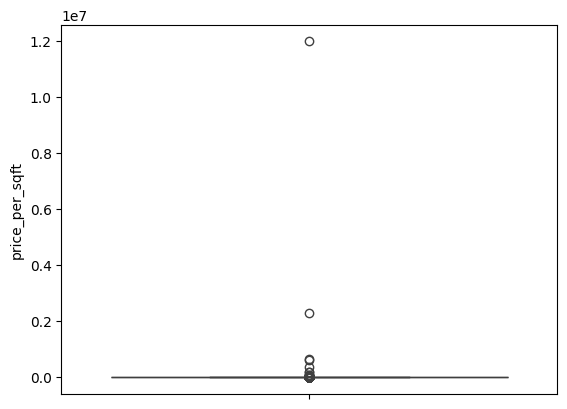

In [104]:
sns.boxplot(df['price_per_sqft'])

<Axes: xlabel='price_per_sqft', ylabel='Count'>

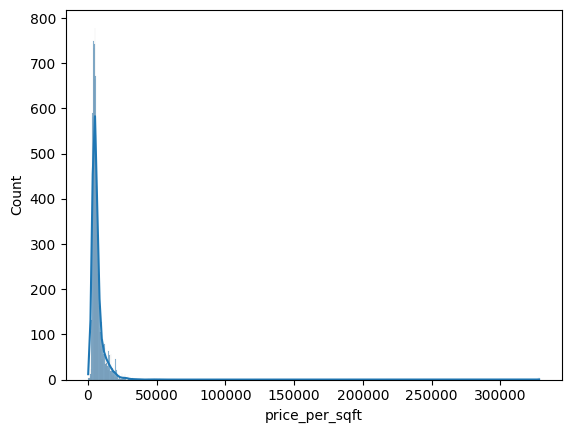

In [107]:
sns.histplot(new_df['price_per_sqft'],kde=True)

### Check the correlation between all the numerical columns and plot heatmap.

In [4]:
# Identify non-numeric columns
non_numeric_columns = df.select_dtypes(include=['object']).columns
print("Non-numeric columns:", non_numeric_columns)


Non-numeric columns: Index(['location', 'size'], dtype='object')


In [10]:
# Drop non-numeric columns
df_numeric = df.drop(columns=non_numeric_columns)


In [11]:
# Compute the correlation matrix
corr= df_numeric.corr()
print(corr)


                total_sqft      bath     price       bhk  price_per_sqft
total_sqft        1.000000  0.392743  0.574330  0.346013       -0.008267
bath              0.392743  1.000000  0.455998  0.897951        0.030883
price             0.574330  0.455998  1.000000  0.396883        0.028387
bhk               0.346013  0.897951  0.396883  1.000000        0.030955
price_per_sqft   -0.008267  0.030883  0.028387  0.030955        1.000000


<Axes: >

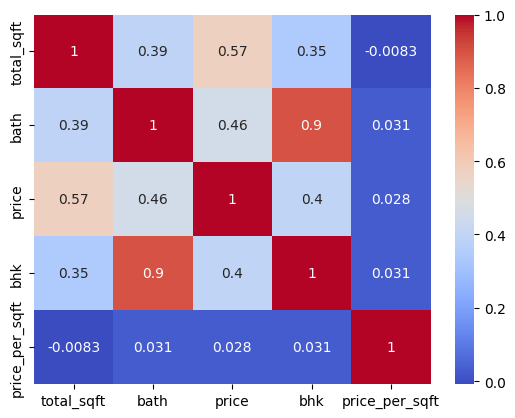

In [12]:
# display correlation matrix in heat map
correlation_matrix=df_numeric.corr()
sns.heatmap(corr,annot=True,cmap='coolwarm')

### Scatter plot between the variables to check the correlation between them.

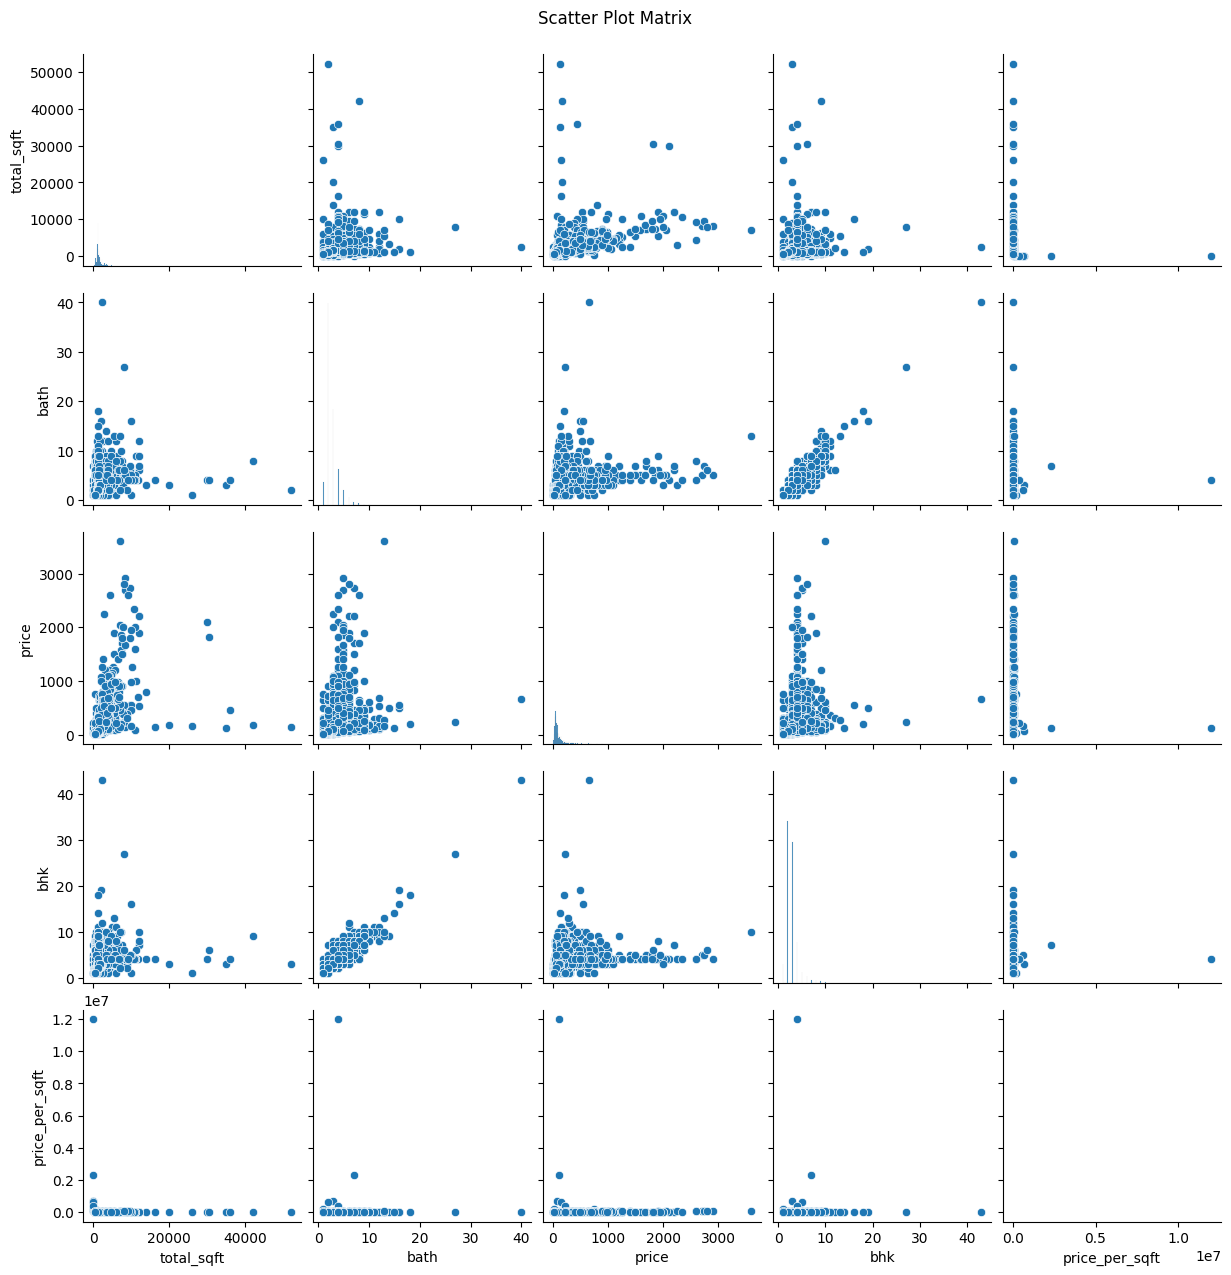

In [15]:
# Create pair plots
sns.pairplot(df_numeric)
plt.suptitle('Scatter Plot Matrix', y=1.02)
plt.show()


### box plot for all numeric column

<Axes: ylabel='total_sqft'>

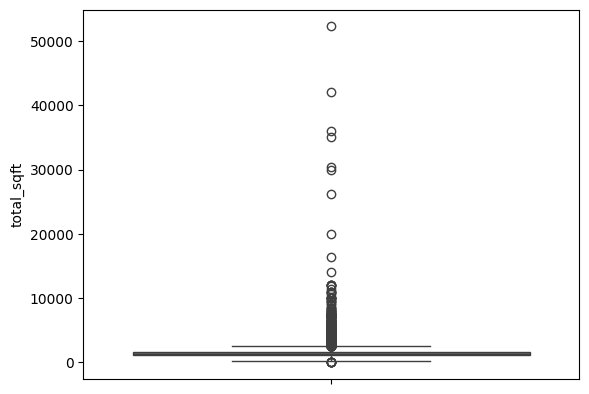

In [74]:
sns.boxplot(df['total_sqft'])

<Axes: ylabel='bath'>

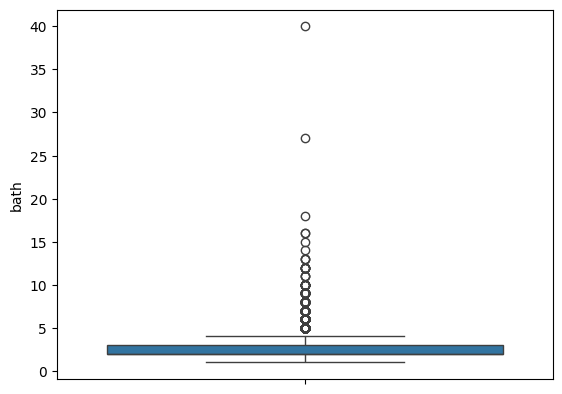

In [75]:
sns.boxplot(df['bath'])

<Axes: ylabel='bhk'>

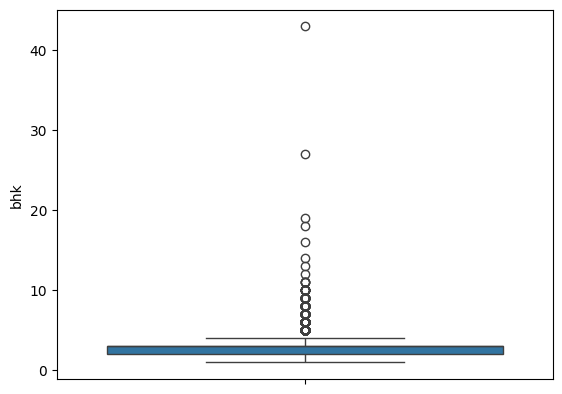

In [76]:
sns.boxplot(df['bhk'])